# Business problem understanding 
## Business context
Olist is a Brazilian e-commerce startup founded in 2015 and launched in 2016, enabling small and medium-sized businesses to sell their products across multiple marketplaces through a single platform. By providing logistics support, marketing tools, and payment services, Olist helps sellers streamline their operations and expand their reach.

In 2018, Brazil had a population of approximately 210 million, with over 150 million people having internet access, and around 60% of them had made online purchases. The e-commerce market was experiencing rapid growth, with transactions estimated at $24 billion. However, with increasing competition, customer retention became a key challenge. Studies indicate that acquiring a new customer can cost five times more than retaining an existing one, while improving customer retention by just 5% can boost a company's profit by 25% to 95%. Moreover, existing customers have a 60% to 70% chance of making a repeat purchase, compared to just 5% to 20% for new customers.

Recognizing these challenges, Olist initially focused on aggressive customer acquisition, investing heavily in marketing. However, as the company matured, it shifted its strategy toward customer retention to maximize lifetime value (LTV) and improve long-term profitability. Data-driven insights play a crucial role in this shift, helping Olist identify at-risk customers and implement targeted marketing strategies. Since re-engaging existing customers can be 40% more cost-effective than acquiring new ones, this approach not only optimizes marketing spend but also strengthens Olist’s position in Brazil’s competitive e-commerce landscape.


## Problem statement
Since its establishment in 2015, Olist has experienced significant growth, but like any other e-commerce platform, it faces the ongoing challenge of customer churn. Studies indicate that the average annual churn rate in e-commerce ranges between 20% and 25%, meaning that without proper retention strategies, a substantial number of customers may disengage, leading to significant revenue loss over time.

While Olist has successfully acquired more than 90000 customers through substantial marketing investments—spending approximately $104 per customer—initial data shows that only 15–20% of these customers make a repeat purchase. This highlights a high churn risk, potentially exceeding 30%, making retention efforts crucial for long-term profitability.

To address this, Olist allocates a marketing budget for customer retention. However, not all customers have an equal risk of churning, and a one-size-fits-all approach can be inefficient and costly. Instead, a data-driven strategy allows for more targeted and effective retention efforts. By identifying at-risk customers based on their behavior and characteristics, Olist can implement personalized interventions, such as:

    Personalized promotions and targeted discounts to re-engage customers.
    Tailored product recommendations to encourage repeat purchases.
    Improved customer service and engagement strategies to enhance satisfaction and loyalty.

Additionally, optimizing marketing spend by focusing retargeting efforts on high-risk customers can significantly reduce costs and increase campaign effectiveness. Olist aims to boost repeat orders by at least 20%, ensuring that acquired customers become long-term, high-value users. By leveraging predictive analytics and strategic customer engagement, Olist can drive higher retention rates, lower marketing expenses, and ultimately, stronger revenue growth in the competitive e-commerce landscape.


## Goals
To address the challenge of customer churn, this study aims to develop a machine learning model capable of predicting the likelihood of churn based on historical transaction data. By analyzing key customer behaviors—such as purchase patterns, transaction frequency, order value, and time since last purchase—the model will uncover the primary factors contributing to churn.

With these insights, Olist can implement targeted retention strategies to engage at-risk customers and enhance customer lifetime value (LTV). The key objectives of this study include:

    Customer Behavior Analysis:
        Identifying patterns in purchase frequency, spending habits, and inactivity periods.
        Determining critical factors influencing customer churn.

    Churn Prediction Model Development:
        Building a high-accuracy classification model to detect high-risk customers.
        Setting a target to reduce churn by at least 20% from the existing baseline.

    Marketing Cost Optimization:
        Directing retargeting efforts toward at-risk segments to maximize efficiency.
        Reducing marketing costs per active customer by up to 30%, compared to new customer acquisition costs.

    Actionable Insights for Retention Strategies:
        Providing data-driven recommendations for personalized campaigns.
        Enhancing engagement strategies to increase repeat purchases and long-term customer retention.

By leveraging predictive analytics, Olist can shift from reactive to proactive customer retention, ensuring that marketing efforts are cost-efficient and highly effective in sustaining long-term business growth.

## Analytic approach
Since churn analysis will be performed in this study and considering that Olist is a relatively new e-commerce, defining churn should not solely based on buying frequency and days of transactions. This is based on the fact that the majority of the new customer will only buy once. Thus, the most relevant approach is by segmenting customer into 3 groups:

    1. New customer: customers who did the first buying 5 months before data retrieval
    2. One-time buyer: customers who only did one transaction and are not new customer
    3. Repeat buyer: customers who have done more than one transcation

## Data information
source: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce
The data is provided by Olist from year 2016 - 2018 with more than 100k orders information. The data is divided into multiple files in which its connection is shown in the schema below



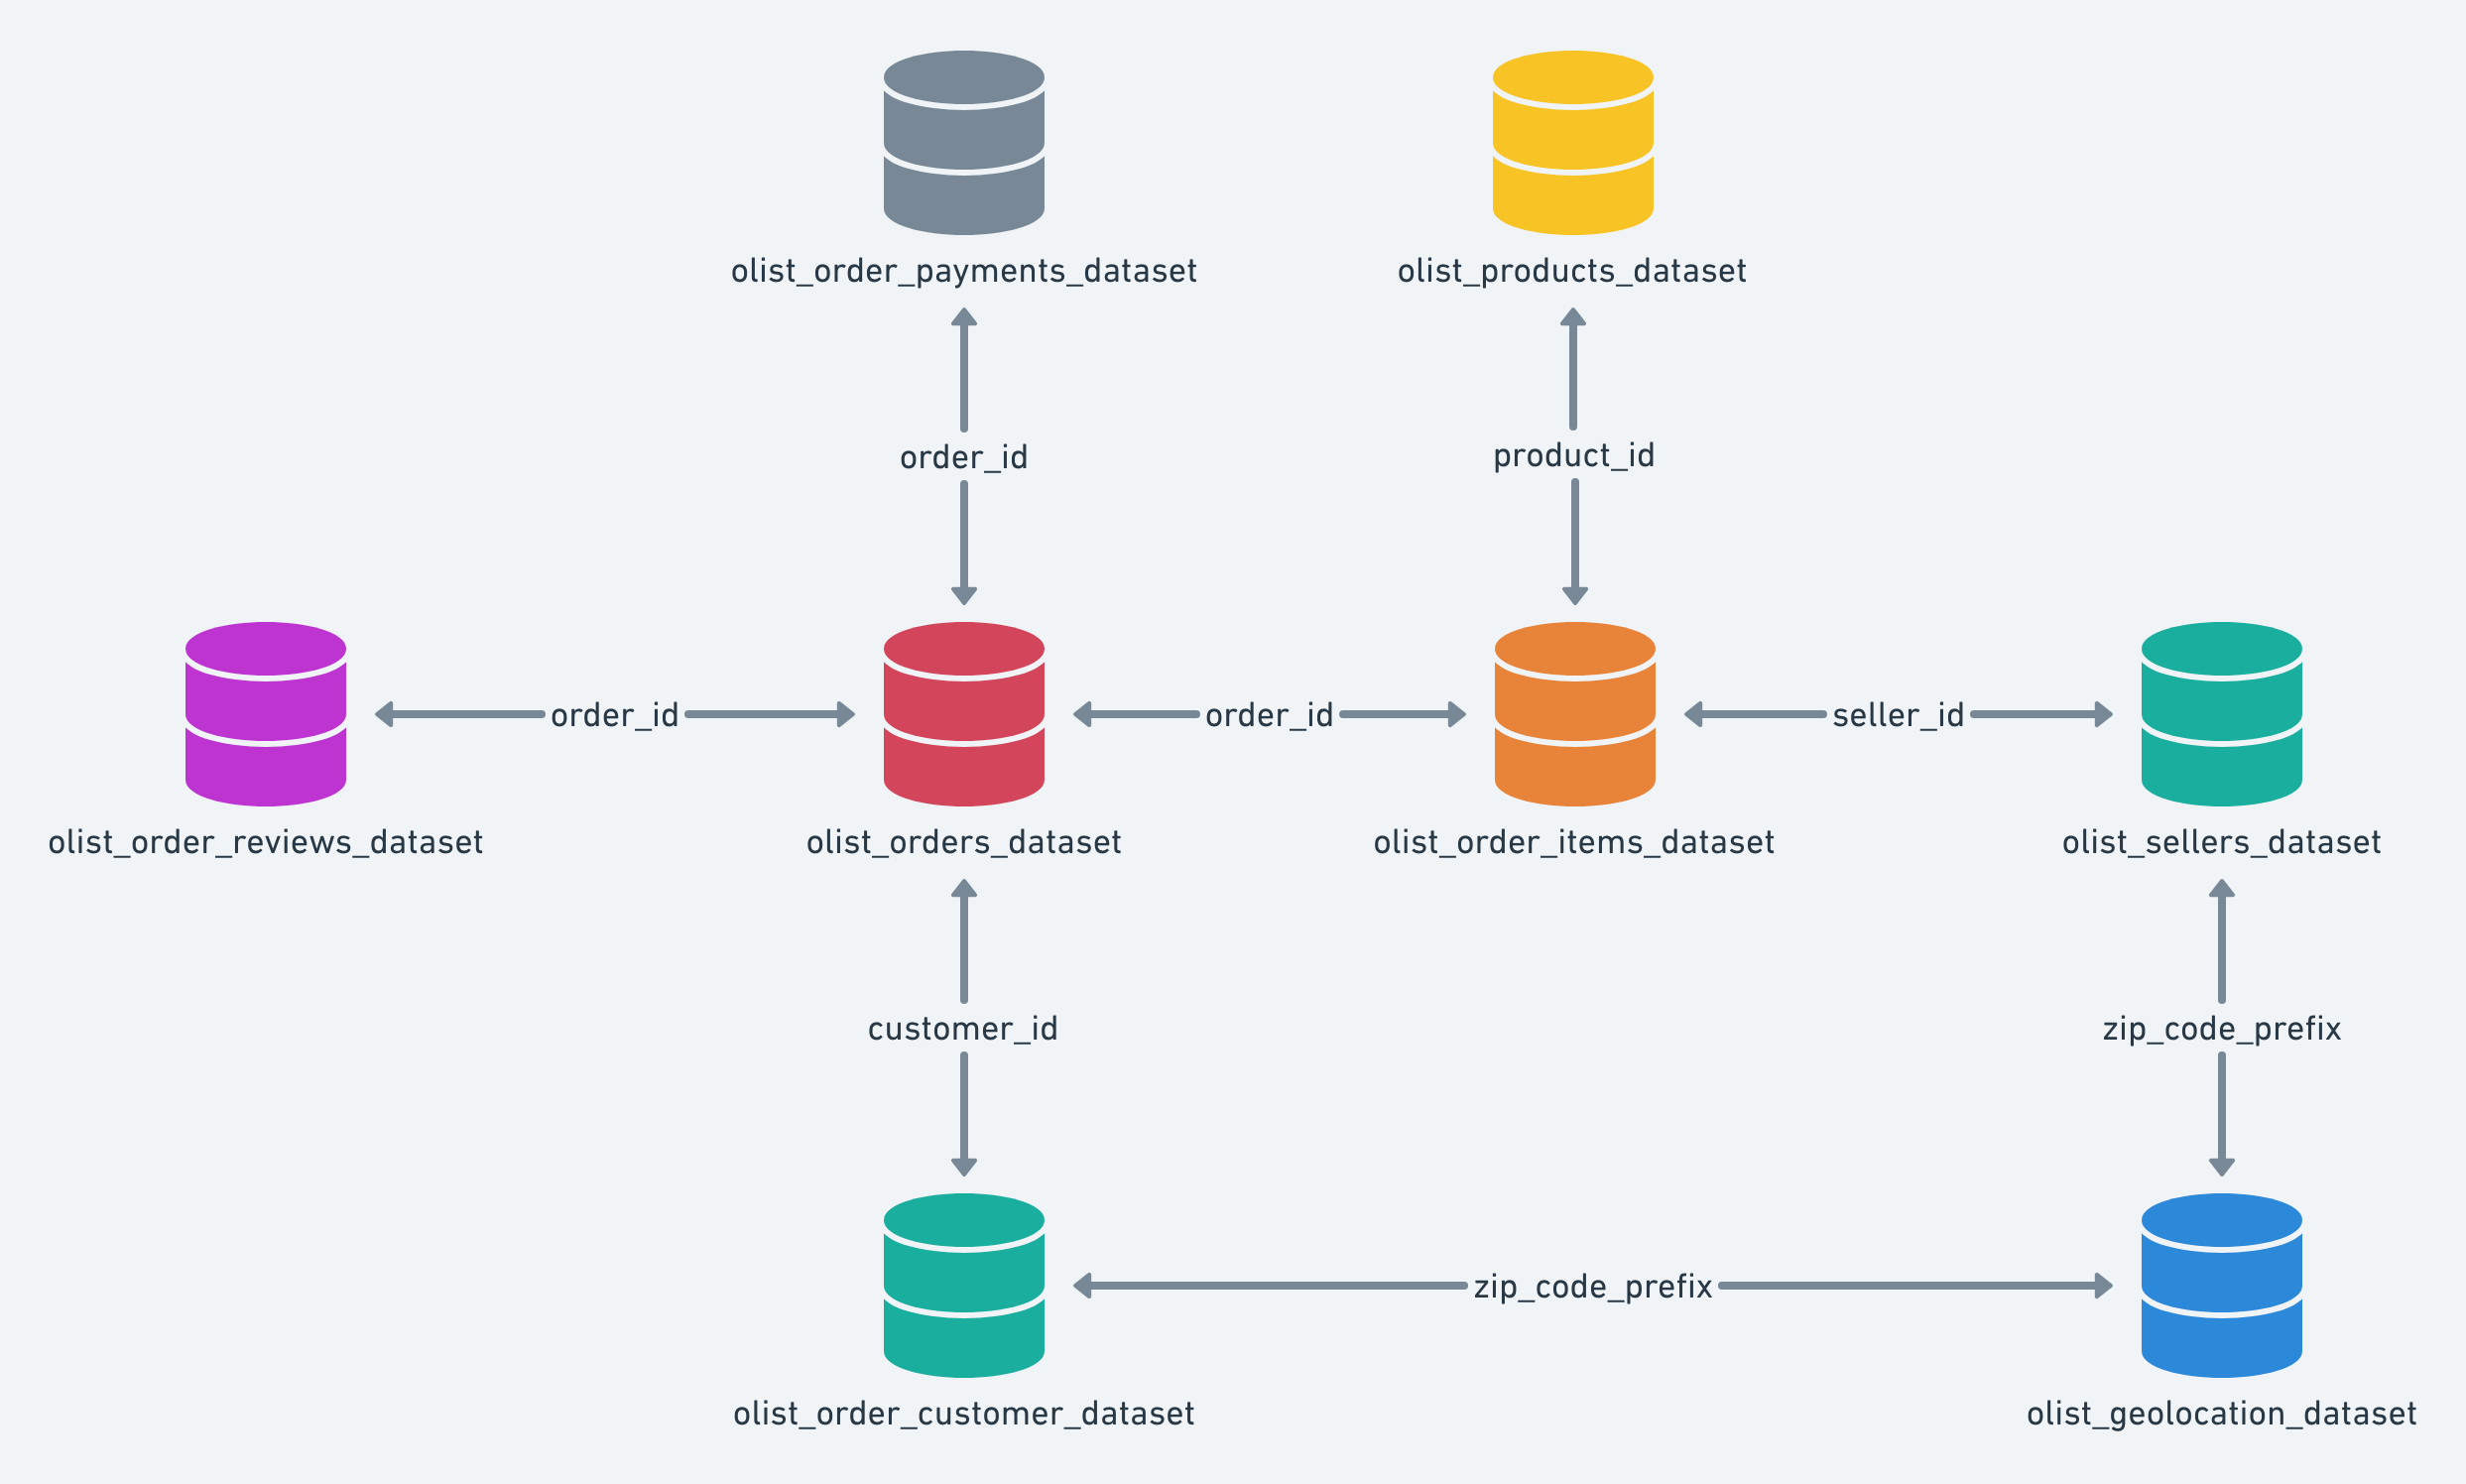

In [92]:
from IPython.display import Image

Image(filename=r'C:\Users\u0150029\Documents\PWD\final_project_alpha\untitled.png')

**Data Dictionary**


| Dataset                     | Column                          | Description                                                                 |
|-----------------------------|--------------------------------|---------------------------------------------------------------------------|
| **olist_customers_dataset**  | customer_id                    | Unique ID of the customer who placed an order                                  |
|                             | customer_unique_id             | 	Unique ID that distinguishes customers more specifically                   |
|                             | customer_zip_code_prefix       | Customer's zip code                                                        |
|                             | customer_city                  | City where the customer resides                                             |
|                             | customer_state                 | State where the customer resides                                           |
| **olist_geolocation_dataset** | geolocation_zip_code_prefix   | Zip code of the geographical location                                                 |
|                             | geolocation_lat                | Latitude of the geographical location                                            |
|                             | geolocation_lng                | Longitude of the geographical location                                           |
|                             | geolocation_city               | City where the geographical location is                                              |
|                             | geolocation_state              | State or province where the geographical location is                       |
| **olist_order_items_dataset** | order_id                      | Unique ID for each order                                             |
|                             | order_item_id                  | Unique ID for each item within an order                                   |
|                             | product_id                     | Unique ID of the purchased product                                                |
|                             | seller_id                      | ID of the seller who sold the product                                            |
|                             | shipping_limit_date            | Shipping deadline for the product                                             |
|                             | price                          | Price of the purchased product                                                  |
|                             | freight_value                  | Shipping cost for the product                                             |
| **olist_order_payments_dataset** | order_id                    | Order ID associated with the payment                                 |
|                             | payment_sequential             | Payment sequence within the order                                          |
|                             | payment_type                   | Payment method (e.g., credit card)                                |
|                             | payment_installments           | Number of installments chosen                                               |
|                             | payment_value                  | Total payment amount                                                    |
| **olist_order_reviews_dataset** | review_id                    | Unique ID for each review given                               |
|                             | order_id                       | Order ID associated with the review                                     |
|                             | review_score                   | Score given by the customer for the product (e.g., 1 to 5)    |
|                             | review_comment_title           | Title of the review comment                                                     |
|                             | review_comment_message         | Content of the review comment given by the customer              |
|                             | review_creation_date           | Date and time when the review was created                                           |
|                             | review_answer_timestamp        | Date and time when the review was answered by the seller or relevant party   |
| **olist_orders_dataset**     | order_id                       | Unique ID for each order                                             |
|                             | customer_id                    | Unique ID of the customer who placed the order                                  |
|                             | order_status                   | Current status of the order (e.g., processing, shipped, or completed)    |
|                             | order_purchase_timestamp       | Date and time when the order was placed                                       |
|                             | order_approved_at              | Date and time when the order was approved                                       |
|                             | order_delivered_carrier_date   | Date the product was shipped by the carrier                                      |
|                             | order_delivered_customer_date  | Date the product was received by the customer                                    |
|                             | order_estimated_delivery_date  | Estimated date for product delivery                               |
| **olist_products_dataset**   | product_category_name_translation | Product name in Portuguese                                        |
|                             | product_category_name          | Product name in Portuguese                                        |
|                             | product_category_name_english  | Product name in English                                         |
|                             | product_id                     | Unique identifier for each product                                    |
|                             | product_category_name          | Category name where the product belongs                               |
|                             | product_name_lenght            | Length of the product name (characters)                                          |
|                             | product_description_lenght     | Length of the product description (characters)                                     |
|                             | product_photos_qty             | Number of available product photos                                                     |
|                             | product_weight_g               | Product weight (grams)                                                         |
|                             | product_length_cm              | Product length (cm)                                                      |
|                             | product_height_cm              | Product height (cm)                                                       |
|                             | product_width_cm               | Product width (cm)                                                        |
| **olist_sellers_dataset**    | seller_id                      | Unique ID for each seller in the system                                       |
|                             | seller_zip_code_prefix         | Zip code of the seller's residence or location                               |
|                             | seller_city                    | City where the seller is located                                           |
|                             | seller_state                   | State or province where the seller is located                    |


# Import Modules

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Load data

In [94]:
customers = pd.read_csv('olist_customers_dataset.csv')
geoloc = pd.read_csv('olist_geolocation_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
products_en = pd.read_csv('product_category_name_translation.csv')

In [95]:
display(customers.head(), geoloc.head(), items.head(), payments.head(), reviews.head(), orders.head(), products.head(), sellers.head(), products_en.head())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Translate the products name into English (was in Portugese)

In [96]:
products = products.merge(products_en, how='left', on='product_category_name')

In [97]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [98]:
#check how many unique values between both to ensure each product has english translation
# pt stands for portuguese

n_products_pt = products['product_category_name'].nunique()
print(f'Number of products in Portuese is: {n_products_pt}')

n_products_en = products_en['product_category_name'].nunique()
print(f'Number of products in English is: {n_products_en}')

Number of products in Portuese is: 73
Number of products in English is: 71


In [99]:
#above result shows that there are 2 missing translations. Code below will perform further check
missing_cat = products.loc[products['product_category_name_english'].isna(), 'product_category_name'].unique()
missing_cat

array([nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

As shown above, there are two categories missing from the product_en and here manual translation will be performed using chatGPT. 
The translation for 'portateis_cozinha_e_preparadores_de_alimentos' is 'portable_kitchen_and_food_processors'.
Here, pc_gamer is already in English, however it will still be incorporated to the 'product_category_name_english'.  

In [100]:
products[products['product_category_name'].isin(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'])].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN


In [101]:
mapping = {'pc_gamer': 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_and_food_processors'}
products.loc[products['product_category_name_english'].isna(), 'product_category_name_english'] = (products['product_category_name'].map(mapping))

In [102]:
#check
products[products['product_category_name'].isin(['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer'])].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,pc_gamer
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,portable_kitchen_and_food_processors
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,portable_kitchen_and_food_processors
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,pc_gamer
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,portable_kitchen_and_food_processors


In [103]:
products['product_category_name'].isna().sum()

610

In [104]:
products['product_category_name_english'].nunique()

73

In [105]:
products['product_category_name_english'].unique()

array(['perfumery', 'art', 'sports_leisure', 'baby', 'housewares',
       'musical_instruments', 'cool_stuff', 'furniture_decor',
       'home_appliances', 'toys', 'bed_bath_table',
       'construction_tools_safety', 'computers_accessories',
       'health_beauty', 'luggage_accessories', 'garden_tools',
       'office_furniture', 'auto', 'electronics', 'fashion_shoes',
       'telephony', 'stationery', 'fashion_bags_accessories', 'computers',
       'home_construction', 'watches_gifts',
       'construction_tools_construction', 'pet_shop', 'small_appliances',
       'agro_industry_and_commerce', nan, 'furniture_living_room',
       'signaling_and_security', 'air_conditioning', 'consoles_games',
       'books_general_interest', 'costruction_tools_tools',
       'fashion_underwear_beach', 'fashion_male_clothing',
       'kitchen_dining_laundry_garden_furniture',
       'industry_commerce_and_business', 'fixed_telephony',
       'construction_tools_lights', 'books_technical',
       'hom

Here, we observed that actually the product names are redundant. Thus, we want to create a new column which specifies which group does each product name belong to

In [106]:
# Create a dictionary with mappings to simplify the categories
category_map = {
    'small_appliances': 'home_and_kitchen',
    'home_appliances': 'home_and_kitchen',
    'home_appliances_2': 'home_and_kitchen',
    'air_conditioning': 'home_and_kitchen',
    'home_comfort_2': 'home_and_kitchen',
    'home_confort': 'home_and_kitchen',
    'portable_kitchen_and_food_processors': 'home_and_kitchen',
    'small_appliances_home_oven_and_coffee': 'home_and_kitchen',
    'bed_bath_table': 'home_and_kitchen',
    'housewares': 'home_and_kitchen',
    'kitchen_dining_laundry_garden_furniture': 'home_and_kitchen',
    
    
    'furniture_living_room': 'furniture',
    'furniture_bedroom': 'furniture',
    'furniture_mattress_and_upholstery': 'furniture',
    'furniture_decor': 'furniture', 
    
    'fashion_bags_accessories': 'fashion',
    'fashion_shoes': 'fashion',
    'fashion_male_clothing': 'fashion',
    'fashio_female_clothing': 'fashion',
    'fashion_underwear_beach': 'fashion',
     
    'baby': 'baby_and_children',
    'fashion_childrens_clothes': 'baby_and_children', 
    
    'books_general_interest': 'books',
    'books_technical': 'books',
    'books_imported': 'books',
    
    'toys': 'toys_and_games',
    'consoles_games': 'toys_and_games',
    
    'food': 'food_and_beverages',
    'food_drink': 'food_and_beverages',
    'drinks': 'food_and_beverages',
    'la_cuisine': 'food_and_beverages', 
    
    'health_beauty': 'health_and_beauty',
    'diapers_and_hygiene': 'health_and_beauty',
    'perfumery': 'health_and_beauty', 
    
    'sports_leisure': 'sports_and_leisure',
    'fashion_sport': 'sports_and_leisure',
    
    'electronics': 'electronics',
    'computers': 'electronics',
    'computers_accessories': 'electronics',
    'audio': 'electronics',
    'telephony': 'electronics', 
    'tablets_printing_image': 'electronics', 
    'fixed_telephony': 'electronics', 
    'pc_gamer': 'electronics',
    
    'stationery': 'office_and_stationery',
    'office_furniture': 'office_and_stationery', 

    'construction_tools_construction': 'tools_and_construction', 
    'construction_tools_lights': 'tools_and_construction',
    'costruction_tools_garden': 'tools_and_construction',
    'home_construction': 'tools_and_construction',
    'construction_tools_safety': 'tools_and_construction', 
    'garden_tools': 'tools_and_construction',
    'costruction_tools_tools': 'tools_and_construction',

    'signaling_and_security': 'security_and_services',
    'security_and_services': 'security_and_services',

    'cool_stuff': 'gifts_and_miscellaneous',
    'watches_gifts': 'gifts_and_miscellaneous',
    'flowers': 'gifts_and_miscellaneous',
    'party_supplies': 'gifts_and_miscellaneous',
    'christmas_supplies': 'gifts_and_miscellaneous',
    'auto': 'gifts_and_miscellaneous',
    'luggage_accessories': 'gifts_and_miscellaneous',
    
    'market_place': 'marketplace',

    'cds_dvds_musicals': 'media',
    'cine_photo': 'media',
    'dvds_blu_ray': 'media',
    
    'music': 'music_and_art',
    'musical_instruments': 'music_and_art',
    'arts_and_craftmanship': 'music_and_art',
    'arts_and_crafts': 'music_and_art',
    'art': 'music_and_art', 

    'pet_shop': 'pet_shop', 
    
    'industry_commerce_and_business': 'industry_and_business',
    'agro_industry_and_commerce': 'industry_and_business', 
}

In [107]:
products['grouped_category'] = products['product_category_name_english'].map(category_map)

In [108]:
products[['product_category_name_english', 'grouped_category']].head()

,product_category_name_english,grouped_category
0,perfumery,health_and_beauty
1,art,music_and_art
2,sports_leisure,sports_and_leisure
3,baby,baby_and_children
4,housewares,home_and_kitchen


In [109]:
print(products[['grouped_category', 'product_category_name_english']].isna().sum())

grouped_category                 610
product_category_name_english    610
dtype: int64


## Merging Data

In [110]:
df = orders.merge(items, how='left', on='order_id')
df = df.merge(payments, how='outer', on='order_id')
df = df.merge(reviews, how='outer', on='order_id')
df = df.merge(products, how='outer', on='product_id')
df = df.merge(customers, how='outer', on='customer_id')
df = df.merge(sellers, how='outer', on='seller_id')

In [111]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,product_category_name_english,grouped_category,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,d455a8cb295653b55abda06d434ab492,944b72539d7e1f7f7fc6e46639ef1fe3,delivered,2017-09-26 22:17:05,2017-09-27 22:24:16,2017-09-29 15:53:03,2017-10-07 16:12:47,2017-10-30 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,36.0,small_appliances,home_and_kitchen,3c7e305796add66698959fc7ad176f6b,87502,umuarama,PR,9080.0,santo andre,SP
1,7f39ba4c9052be115350065d07583cac,d7fc82cbeafea77bd0a8fbbf6296e387,delivered,2017-10-18 08:16:34,2017-10-18 23:56:20,2017-10-20 14:29:01,2017-10-27 16:46:05,2017-11-09 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,36.0,small_appliances,home_and_kitchen,9de5797cddb92598755a0f76383ddbbb,35490,entre rios de minas,MG,9080.0,santo andre,SP
2,9dc8d1a6f16f1b89874c29c9d8d30447,d9442164acf4b03109425633efaa0cfc,delivered,2017-10-12 13:33:22,2017-10-12 13:49:22,2017-10-17 15:42:42,2017-10-24 20:17:44,2017-11-06 00:00:00,1.0,a2ff5a97bf95719e38ea2e3b4105bce8,...,36.0,small_appliances,home_and_kitchen,9915eb9f74b6c11aaf04833f65b00e93,38600,paracatu,MG,9080.0,santo andre,SP
3,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,1.0,08574b074924071f4e201e151b152b4e,...,39.0,garden_tools,tools_and_construction,dce323533e45e74d215e0fe7fb114118,24710,sao goncalo,RJ,29156.0,cariacica,ES
4,0f548bd29148ebc519d6495e37a284e1,015faf9ec36eccd957c0f2782aab09a4,delivered,2017-09-03 08:06:30,2017-09-03 08:25:50,2017-09-04 22:03:06,2017-09-08 16:26:55,2017-09-27 00:00:00,2.0,08574b074924071f4e201e151b152b4e,...,39.0,garden_tools,tools_and_construction,dce323533e45e74d215e0fe7fb114118,24710,sao goncalo,RJ,29156.0,cariacica,ES


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

## Data Cleaning

The idea here is that to drop columns that are not useful. For example: the reviews are in Portuguese, beside it does not align with the purpose of the analysis, such data type requires different data handling. Same reason goes to the products. the column that will be dropped are:
- review_id
- review_comment_title
- review_comment_message
- review_creation_date
- review_answer_timestamp
- product_name_length
- product_description_length
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm
- product_category_name
- customer_zip_code_prefix (?)
- seller_zip_code_prefix (?)

In [113]:
df.drop(columns=['review_id', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'product_category_name'], inplace= True)  

In [114]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 177
order_delivered_carrier_date     2086
order_delivered_customer_date    3421
order_estimated_delivery_date       0
order_item_id                     833
product_id                        833
seller_id                         833
shipping_limit_date               833
price                             833
freight_value                     833
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_score                      997
product_category_name_english    2542
grouped_category                 2542
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            833
seller_city 

## Handling duplicate data 

Since everything was merged based on the orders dataset, thus it make sense that in order to eliminate duplicate values, it should then be order_id. It still make perfect sense for the rest of the columns to have duplicate value

In [115]:
df = df.drop_duplicates(subset='order_id', keep='first')

In [116]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
review_score                      768
product_category_name_english    2188
grouped_category                 2188
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            775
seller_city 

## Drop NaN value

In [117]:
df.dropna(inplace=True)

In [118]:
df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
product_category_name_english    0
grouped_category                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       94470 non-null  object 
 1   customer_id                    94470 non-null  object 
 2   order_status                   94470 non-null  object 
 3   order_purchase_timestamp       94470 non-null  object 
 4   order_approved_at              94470 non-null  object 
 5   order_delivered_carrier_date   94470 non-null  object 
 6   order_delivered_customer_date  94470 non-null  object 
 7   order_estimated_delivery_date  94470 non-null  object 
 8   order_item_id                  94470 non-null  float64
 9   product_id                     94470 non-null  object 
 10  seller_id                      94470 non-null  object 
 11  shipping_limit_date            94470 non-null  object 
 12  price                          94470 non-null  flo

## Change data format

In [120]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

for columns in df.columns:
    if columns in date_columns:
        df[columns] = pd.to_datetime(df[columns])
    

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94470 non-null  object        
 1   customer_id                    94470 non-null  object        
 2   order_status                   94470 non-null  object        
 3   order_purchase_timestamp       94470 non-null  datetime64[ns]
 4   order_approved_at              94470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   94470 non-null  datetime64[ns]
 6   order_delivered_customer_date  94470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  94470 non-null  datetime64[ns]
 8   order_item_id                  94470 non-null  float64       
 9   product_id                     94470 non-null  object        
 10  seller_id                      94470 non-null  object        
 11  shipping_limit_date

In [122]:
df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
product_category_name_english    0
grouped_category                 0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
dtype: int64

## Change column name

In [123]:
df = df.rename(columns={'product_category_name_english': 'product_name'})

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94470 entries, 0 to 118309
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       94470 non-null  object        
 1   customer_id                    94470 non-null  object        
 2   order_status                   94470 non-null  object        
 3   order_purchase_timestamp       94470 non-null  datetime64[ns]
 4   order_approved_at              94470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   94470 non-null  datetime64[ns]
 6   order_delivered_customer_date  94470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  94470 non-null  datetime64[ns]
 8   order_item_id                  94470 non-null  float64       
 9   product_id                     94470 non-null  object        
 10  seller_id                      94470 non-null  object        
 11  shipping_limit_date

In [125]:
df.reset_index(drop=True, inplace=True)

# EDA and Data Visualization

## 1. Customer segmentation

                 customer_unique_id      first_purchase       last_purchase  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27 2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27 2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03 2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41 2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42 2017-11-14 19:45:42   

   num_orders         segment  
0           1  One-Time Buyer  
1           1  One-Time Buyer  
2           1  One-Time Buyer  
3           1  One-Time Buyer  
4           1  One-Time Buyer  


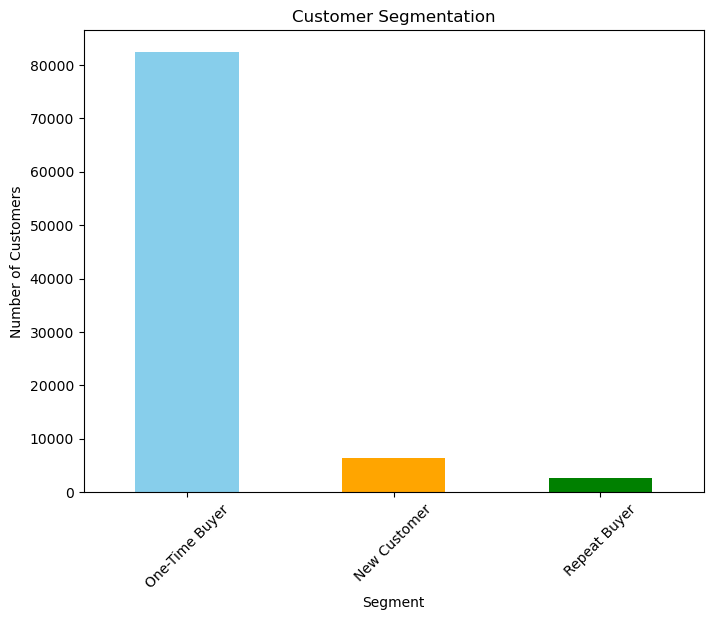

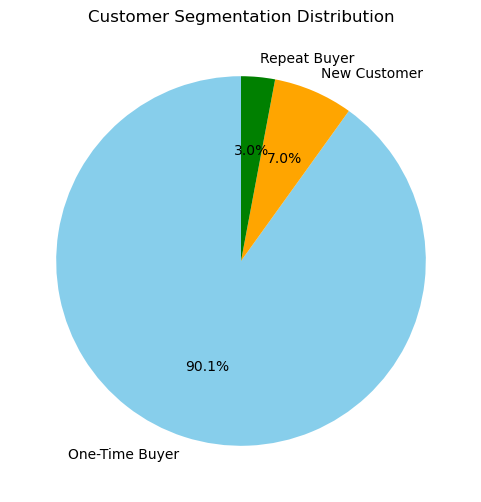

In [126]:
# Set the reference date and count 5 months before 
reference_date = pd.to_datetime("2018-12-31")
threshold_new_customer = reference_date - pd.DateOffset(months=5)

# Create a customer segmentation data frame based on customer_choose the first buying date and number of order
customer_seg = df.groupby('customer_unique_id').agg(
    first_purchase=('order_purchase_timestamp', 'min'),
    last_purchase=('order_purchase_timestamp', 'max'),
    num_orders=('order_id', 'nunique')
).reset_index()

# Function to classified customers
def segment_customer(row):
    if row['num_orders'] > 1:
        return 'Repeat Buyer'
    else:
        # num_orders == 1
        if row['first_purchase'] >= threshold_new_customer:
            return 'New Customer'
        else:
            return 'One-Time Buyer'

# apply the function to each row
customer_seg['segment'] = customer_seg.apply(segment_customer, axis=1)

# show some of the result
print(customer_seg.head())

# Segmentation visualization
# Count number of consumers per-segment
segment_counts = customer_seg['segment'].value_counts()

# Visualization using barchart and pie chart
plt.figure(figsize=(8,6))
segment_counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Customer Segmentation')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6,6))
segment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green'])
plt.title('Customer Segmentation Distribution')
plt.ylabel('')
plt.show()



In [127]:
customer_seg

,customer_unique_id,first_purchase,last_purchase,num_orders,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,One-Time Buyer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,One-Time Buyer
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,One-Time Buyer
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,One-Time Buyer
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,One-Time Buyer
...,...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36,1,One-Time Buyer
91461,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56,1,One-Time Buyer
91462,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16,1,One-Time Buyer
91463,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41,1,One-Time Buyer


From the visualization above, we can see that 90.1% of customers are One-Time Buyers, 7% are Repeat Buyers, and 3% are New Customers. Given this distribution, we cannot define churn solely based on the number of days without a transaction, as the majority of new customers only make a single purchase.

To address this, churn must be defined differently for each segment:

    One-Time Buyer: If they do not make a second purchase within a specific period (e.g., 6 months) after their first purchase, they are considered churned.
    Repeat Buyer: If they do not make another purchase beyond twice their average interpurchase time, they are considered churned.
    New Customer: Since they are within the last 3 months, there is not enough data to determine churn. Instead, they will be monitored with the goal of converting them into Repeat Buyers.

By using this approach, the definition of churn becomes more accurate and aligned with customer behavior in each segment, allowing for better-targeted retention strategies.

## 2. Defining churn per customer segment

In [128]:
threshold = 180 #6 months (180 days)

def define_churn(row):
    segment = row['segment']
    first_purchase = row['first_purchase']
    last_purchase = row['last_purchase']
    num_orders = row['num_orders']
    
    # Hitung selisih hari
    days_since_first = (reference_date - first_purchase).days
    days_since_last = (reference_date - last_purchase).days
    
    if segment == 'New Customer':
        # Too early to conclude 
        return 0
    
    elif segment == 'One-Time Buyer':
        # It is churn if it is >6 months from the reference date
        if days_since_first > threshold:
            return 1
        else:
            return 0
    
    elif segment == 'Repeat Buyer':
        # If recency > 180 days, it is churn
        if days_since_last > threshold:
            return 1
        else:
            return 0

customer_seg['churn'] = customer_seg.apply(define_churn, axis=1)

                 customer_unique_id      first_purchase       last_purchase  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:27 2018-05-10 10:56:27   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:27 2018-05-07 11:11:27   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03 2017-03-10 21:05:03   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:41 2017-10-12 20:29:41   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:42 2017-11-14 19:45:42   

   num_orders         segment  churn  
0           1  One-Time Buyer      1  
1           1  One-Time Buyer      1  
2           1  One-Time Buyer      1  
3           1  One-Time Buyer      1  
4           1  One-Time Buyer      1  


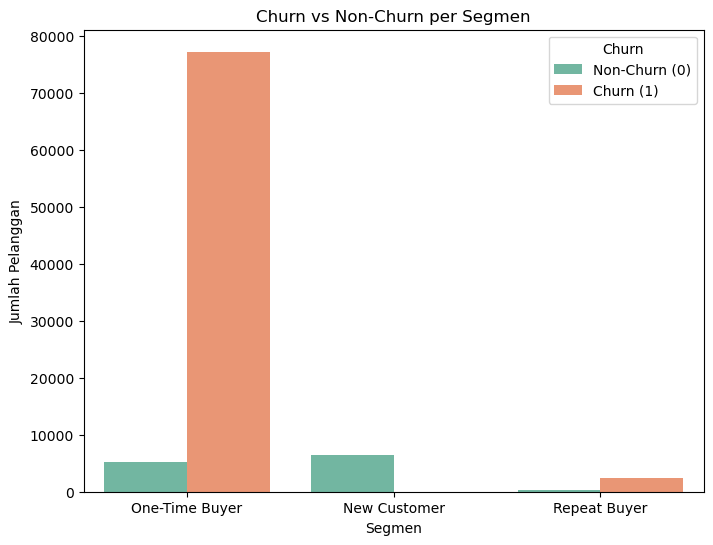

In [129]:
# Show the segmentation and churn
print(customer_seg.head())

# Visualizing customer segment and churn
segment_counts = customer_seg['segment'].value_counts()

plt.figure(figsize=(8,6))
sns.countplot(data=customer_seg, x='segment', hue='churn', palette='Set2')
plt.title("Churn vs Non-Churn per Segmen")
plt.xlabel("Segmen")
plt.ylabel("Jumlah Pelanggan")
plt.legend(title="Churn", labels=["Non-Churn (0)", "Churn (1)"])
plt.show()

From the results above, we can observe:

    - For New Customers, 100% of them have not churned, which aligns with expectations.
    - For One-Time Buyers, more than 90% of this segment has churned. We need to refine the definition of when they are considered churned.
    - For Repeat Buyers, 80% of this segment still behaves similarly to One-Time Buyers. We need to better define when they should be classified as churned.

Since Olist is an e-commerce platform selling various types of products with different purchase cycles, we cannot rely on a single universal time frame to define churn. Each product category has its own unique repeat order pattern, so the churn definition should be adjusted based on the characteristics of the products customers purchase. By doing so, we can identify churn behavior more accurately and develop more effective retention strategies.

In [130]:
customer_seg

,customer_unique_id,first_purchase,last_purchase,num_orders,segment,churn
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05-10 10:56:27,1,One-Time Buyer,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05-07 11:11:27,1,One-Time Buyer,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03-10 21:05:03,1,One-Time Buyer,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10-12 20:29:41,1,One-Time Buyer,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11-14 19:45:42,1,One-Time Buyer,1
...,...,...,...,...,...,...
91460,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,2017-06-08 21:00:36,1,One-Time Buyer,1
91461,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,2017-12-10 20:07:56,1,One-Time Buyer,1
91462,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,2017-02-07 15:49:16,1,One-Time Buyer,1
91463,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41,2018-05-02 15:17:41,1,One-Time Buyer,1


### To perform more analysis, customer_seg is merged with the main df based on customer_unique_id

In [131]:
df = df.merge(customer_seg, how='outer', on='customer_unique_id')

### Top 5 grouped category per customer segment

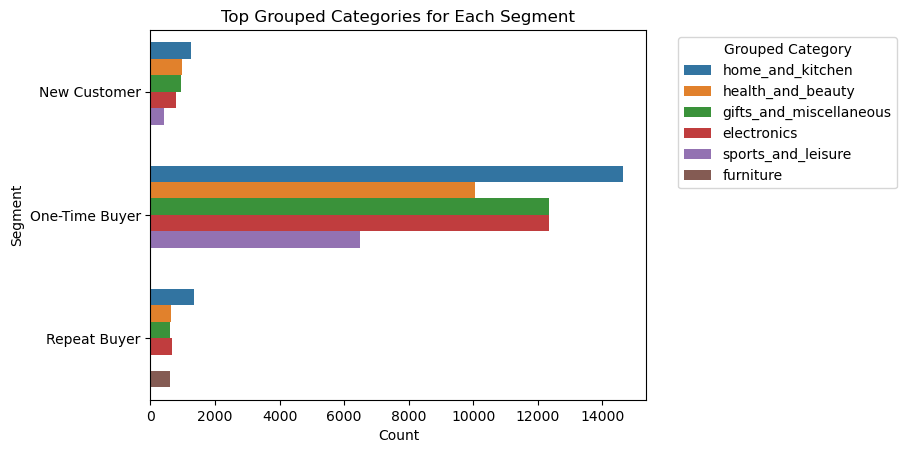

In [132]:
top_categories_per_segment = (
    df.groupby(['segment', 'grouped_category'])
    .size()
    .reset_index(name='count')
    .sort_values(['segment', 'count'], ascending=[True, False])
    .groupby('segment')
    .head(5)  # Select the top category for each segment
)

top_categories_per_segment

sns.barplot(
    data=top_categories_per_segment,
    y='segment',
    x='count',
    hue='grouped_category',
    dodge=True
)


plt.xlabel("Count")
plt.ylabel("Segment")
plt.title("Top Grouped Categories for Each Segment")
plt.legend(title="Grouped Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

From the horizontal bar plot above, it can be seen that grouped categories for each customer segment are the same except repear buyer where it also has furniture in its top 5 the most 

### Payment value per customer segment

In [133]:
segment_payment = df.groupby("segment")["payment_value"].sum().reset_index()
segment_payment

,segment,payment_value
0,New Customer,981264.57
1,One-Time Buyer,13048643.09
2,Repeat Buyer,820569.25


C:\Users\u0150029\AppData\Local\Temp\ipykernel_24720\2050059408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_payment, x='segment', y='payment_value', palette='viridis')


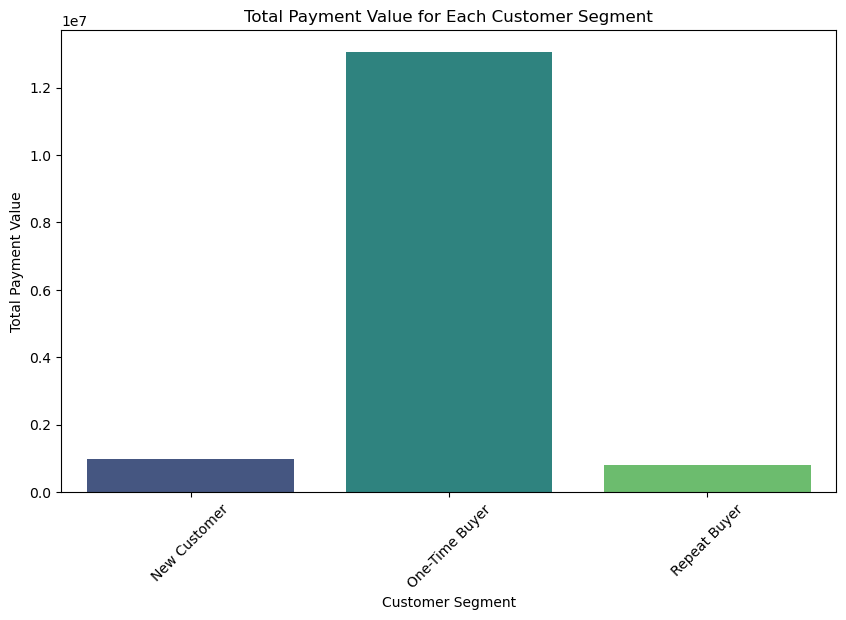

In [134]:
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_payment, x='segment', y='payment_value', palette='viridis')
plt.xlabel("Customer Segment")
plt.ylabel("Total Payment Value")
plt.title("Total Payment Value for Each Customer Segment")
plt.xticks(rotation=45)
plt.show()

The result above correlates with the fact that one time buyer is dominating the customer segment, thus contribute to the overall total payment value. The second highest contributor is new customer and the last is repeat buyer

## 3. Order growth over the years

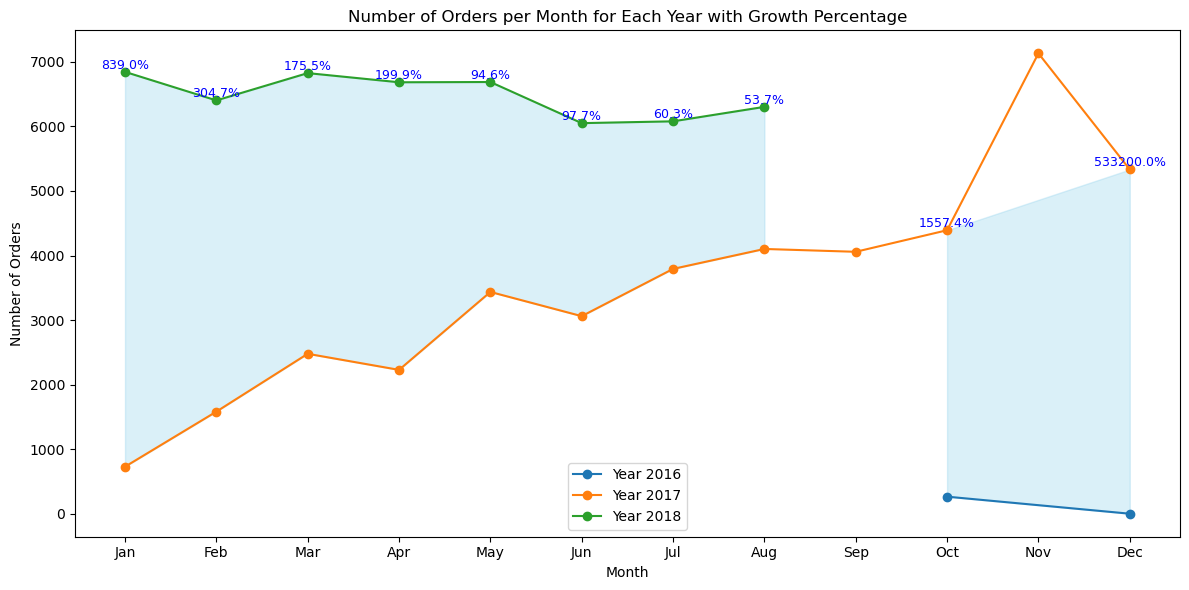

In [135]:
df['order_year'] = df['order_purchase_timestamp'].dt.year
df['order_month'] = df['order_purchase_timestamp'].dt.month

monthly_data = df.groupby(['order_year', 'order_month']).agg(
    number_of_orders=('order_id', 'nunique')  
).reset_index()

plt.figure(figsize=(12, 6))

for year in monthly_data['order_year'].unique():
    year_data = monthly_data[monthly_data['order_year'] == year]
    
    plt.plot(year_data['order_month'], year_data['number_of_orders'], marker='o', label=f'Year {year}')
    
    if year > min(monthly_data['order_year']):
        prev_year_data = monthly_data[monthly_data['order_year'] == year - 1]

        
        merged_data = pd.merge(year_data, prev_year_data, on='order_month', suffixes=('_current', '_prev'))
        
        growth_percentage = (merged_data['number_of_orders_current'] - merged_data['number_of_orders_prev']) / merged_data['number_of_orders_prev'] * 100
        
        plt.fill_between(merged_data['order_month'], merged_data['number_of_orders_prev'], merged_data['number_of_orders_current'], color='skyblue', alpha=0.3)
        
        for i, month in enumerate(merged_data['order_month']):
            plt.text(month, merged_data['number_of_orders_current'][i], f'{growth_percentage.iloc[i]:.1f}%', 
                     ha='center', va='bottom', fontsize=9, color='blue')

plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Month for Each Year with Growth Percentage')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend()

plt.tight_layout()
plt.show()


The chart visualizes the number of orders placed each month across three years: 2016, 2017, and 2018. The y-axis represents the Number of Orders, ranging from 0 to 7000, while the x-axis lists the months from January (Jan) to December (Dec).
Key Observations:

    ** Order Trends Over Months **:

        - The number of orders fluctuates significantly across different months. There are noticeable peaks and troughs, indicating seasonal variations in order volumes.

        - Certain months, such as December, might show higher order volumes, possibly due to holiday shopping or end-of-year sales.

    Year-over-Year Growth:

        The chart includes growth percentages, highlighting the increase in orders from one year to the next.

        2017 shows substantial growth compared to 2016, with some months experiencing growth rates as high as 839.0%.

        2018 continues this growth trend, though at a slightly moderated pace, with growth percentages like 204.7% and 175.5%.

    Exceptional Growth Spikes:

        There are extraordinary growth spikes noted, such as 15,374% and 533,200.0%. These could indicate either a significant market expansion, a successful marketing campaign, or possibly a data anomaly that warrants further investigation.

    Overall Growth Trend:

        The overall trend from 2016 to 2018 is positive, indicating a healthy increase in the number of orders over the years.

        The growth percentages suggest that the business experienced rapid expansion during this period.

Insights:

    Seasonality: The data suggests that the business experiences seasonal peaks, which could be leveraged for targeted marketing and inventory planning.

    Growth Opportunities: The high growth percentages, especially in 2017, indicate successful strategies that could be analyzed and replicated in future periods.

    Data Verification: The exceptionally high growth rates (e.g., 533,200.0%) should be verified for accuracy to ensure they are not due to data entry errors or other anomalies.

## 4. Delivery time

In [136]:
df[['order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date']]

,order_estimated_delivery_date,order_delivered_customer_date,order_delivered_carrier_date
0,2018-05-21,2018-05-16 20:48:37,2018-05-12 08:18:00
1,2018-05-15,2018-05-10 18:02:42,2018-05-09 12:18:00
2,2017-04-07,2017-04-05 14:38:47,2017-03-13 12:58:30
3,2017-11-13,2017-11-01 21:23:05,2017-10-13 20:08:19
4,2017-12-05,2017-11-27 23:08:56,2017-11-16 19:52:10
...,...,...,...
94465,2017-08-02,2017-07-06 09:22:00,2017-06-23 13:03:27
94466,2018-01-12,2018-01-09 22:28:20,2017-12-21 16:27:01
94467,2017-03-24,2017-02-22 12:45:04,2017-02-08 10:04:37
94468,2018-05-28,2018-05-14 11:54:26,2018-05-03 16:45:00


In [137]:
df['actual_shipping_days'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.days

In [138]:
df['actual_shipping_days'] = df['actual_shipping_days'].astype(int)

In [139]:
# this shows an error in the system because the customer received the product before the delivered date 
df['actual_shipping_days'].lt(0).sum()

22

In [140]:
df['actual_shipping_days'] = df['actual_shipping_days'].where(df['actual_shipping_days'] >= 0, -999)

In [141]:
df['estimated_shipping_days'] = df['order_estimated_delivery_date'] - df['order_delivered_carrier_date']
df['estimated_shipping_days'] = df['estimated_shipping_days'].dt.days.astype(int)

In [142]:
df['estimated_shipping_days'].lt(0).sum()

445

In [143]:
df['estimated_shipping_days'] = df['estimated_shipping_days'].where(df['estimated_shipping_days'] >= 0, -999)

In [144]:
df['shipping_delay'] = df['actual_shipping_days'] - df['estimated_shipping_days']
df['shipping_delay'] = df['shipping_delay'].astype(int)

In [145]:
late = (df['shipping_delay'].gt(0) & df['shipping_delay'].lt(700)).sum()
early = df['shipping_delay'].lt(0).sum()
ontime = df['shipping_delay'].eq(0).sum()
error = df['shipping_delay'].gt(600).sum()

In [146]:
print(late, "orders were late")  
print(early, "orders were early") 
print(ontime, "orders were on time") 
print(error, "system error")

6581 orders were late
86055 orders were early
1389 orders were on time
445 system error


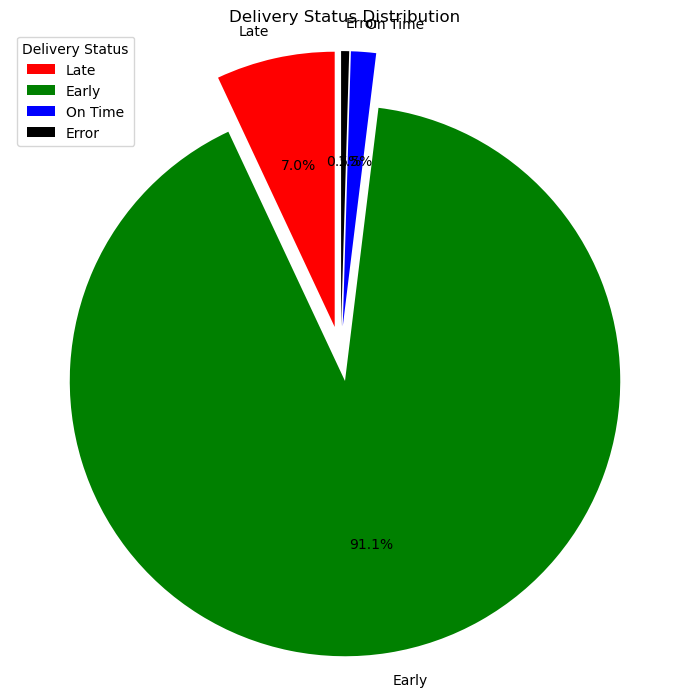

In [147]:
# Pie chart
sizes = [late, early, ontime, error]
labels = ['Late', 'Early', 'On Time', 'Error']
colors = ['red', 'green', 'blue', 'black']

# Create an explode effect to separate the slices
explode = (0.1, 0.1, 0.1, 0.1)  # Slightly separate each slice

fig, ax = plt.subplots(figsize=(7, 7))  # Adjust the figure size to make the chart bigger
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
ax.set_title('Delivery Status Distribution')
ax.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.

# Add a legend
plt.legend(labels, title="Delivery Status", loc="upper left")

# Adjust layout
plt.tight_layout()

plt.show()

The figure above indicates that delivery performance is strong, with the majority of orders arriving early. However, a closer analysis of late deliveries, which account for 7% of all shipments, provides deeper insights into potential areas for improvement.

In [148]:
def categorize_delivery_status(delay):
    if 0 < delay < 700:
        return 'late'
    elif delay < 0:
        return 'early'
    elif delay == 0:
        return 'ontime'
    elif delay > 600:
        return 'error'
    else:
        return 'unknown'  # This handles any unexpected cases

# Apply the function to create the new column
df['delivery_status'] = df['shipping_delay'].apply(categorize_delivery_status)

### Late Deliveries

In [149]:
late_delivery_info = df[df['delivery_status'] == 'late'][['seller_state', 'customer_state', 'grouped_category', 'review_score']]

In [150]:
seller_city_counts = late_delivery_info['seller_state'].value_counts().reset_index()
customer_city_counts = late_delivery_info['customer_state'].value_counts().reset_index()

seller_city_counts.columns = ['state', 'seller_state']
customer_city_counts.columns = ['state', 'customer_state']

city_counts = pd.merge(seller_city_counts, customer_city_counts, on='state', how='outer').fillna(0)

total_sellers = city_counts['seller_state'].sum()
total_customers = city_counts['customer_state'].sum()

city_counts['seller_percentage'] = (city_counts['seller_state'] / total_sellers) * 100
city_counts['customer_percentage'] = (city_counts['customer_state'] / total_customers) * 100

city_counts[['state', 'seller_percentage', 'customer_percentage']]

,state,seller_percentage,customer_percentage
0,AC,0.000000,0.045586
1,AL,0.000000,1.321988
2,AM,0.015195,0.091172
3,AP,0.000000,0.045586
4,BA,0.455858,6.260447
5,CE,0.121562,2.750342
6,DF,0.668591,2.005774
7,ES,0.258319,3.297371
8,GO,0.243124,2.020969
9,MA,1.154840,1.960188


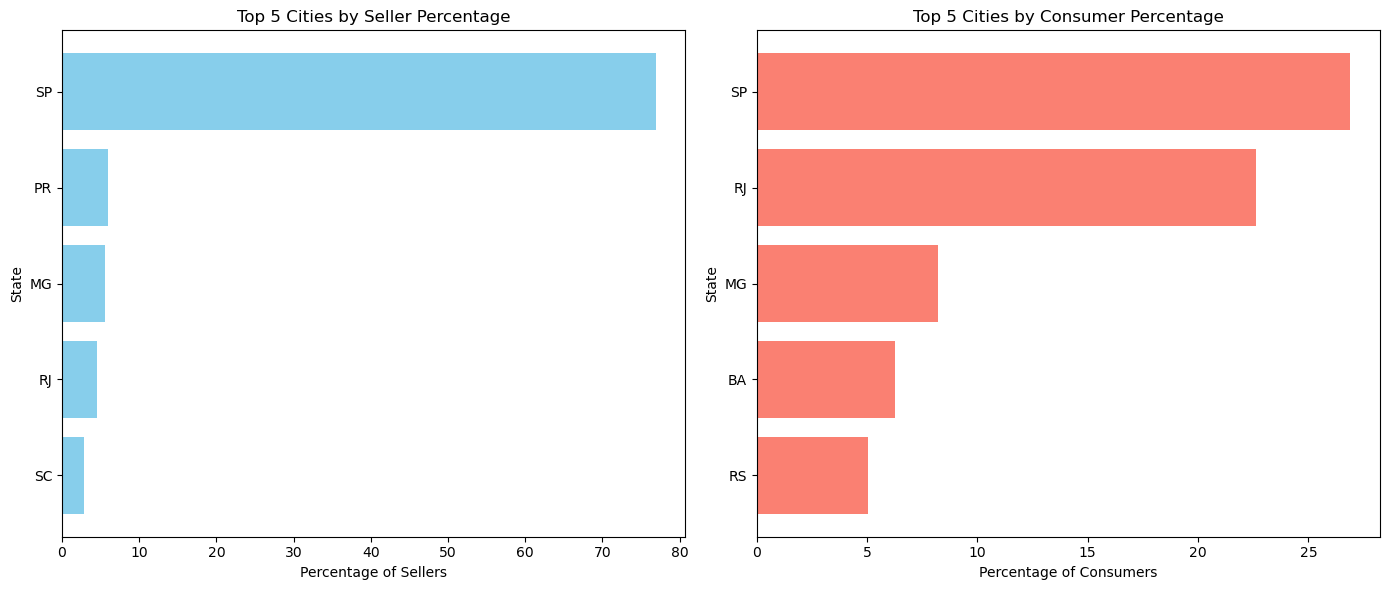

In [151]:
# Get the top 5 cities with the highest percentage of sellers and consumers
top_seller_states = city_counts[['state', 'seller_percentage']].sort_values(by='seller_percentage').tail(5)
top_customer_states = city_counts[['state', 'customer_percentage']].sort_values(by='customer_percentage').tail(5)
# Plotting the top 5 seller cities by percentage
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Seller percentage bar chart
ax[0].barh(top_seller_states['state'], top_seller_states['seller_percentage'], color='skyblue')
ax[0].set_title('Top 5 Cities by Seller Percentage')
ax[0].set_xlabel('Percentage of Sellers')
ax[0].set_ylabel('State')

# Consumer percentage bar chart
ax[1].barh(top_customer_states['state'], top_customer_states['customer_percentage'], color='salmon')
ax[1].set_title('Top 5 Cities by Consumer Percentage')
ax[1].set_xlabel('Percentage of Consumers')
ax[1].set_ylabel('State')

plt.tight_layout()
plt.show()


The figures highlight the top five cities experiencing late deliveries for both sellers and customers. Notably, both perspectives agree that São Paulo (SP), Brazil’s largest city, has the highest number of late deliveries. Sellers from SP account for approximately 75% of these delays, a significantly larger share compared to other cities.

For customers, late deliveries are more evenly distributed, with Rio de Janeiro (RJ) also contributing notably to delays. Several factors may explain these trends:

    High Order Volume – São Paulo, as Brazil’s economic hub, has a high concentration of sellers, leading to increased logistical demands and potential bottlenecks.
    Traffic Congestion – Both SP and RJ are known for heavy traffic, which can slow down transportation and last-mile deliveries.
    Infrastructure Challenges – Delays may also stem from warehouse processing times, road conditions, or inefficiencies in distribution networks.
    Distance and Delivery Routes – For customers, late deliveries may be influenced by the distance from distribution centers, weather conditions, or delivery service reliability.

Further analysis of logistics operations in these cities could help identify targeted solutions to reduce delays.

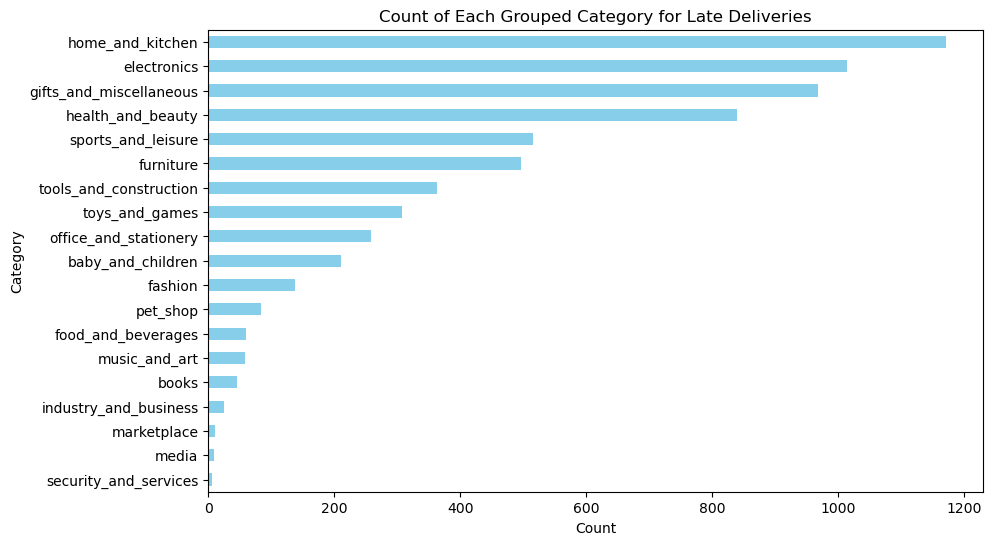

In [152]:
late_delivery_info['grouped_category'].value_counts()

category_counts = late_delivery_info['grouped_category'].value_counts().sort_values(ascending=True)

category_counts.plot(kind='barh', figsize=(10, 6), color='skyblue')

plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Count of Each Grouped Category for Late Deliveries')

plt.show()

Understanding these patterns can help optimize inventory management, streamline logistics, and improve delivery performance for these high-risk categories. The most frequently delayed product categories include Home & Kitchen, Electronics, Gifts & Miscellaneous, and Health & Beauty. These delays are particularly prevalent in major cities like São Paulo (SP) and Rio de Janeiro (RJ), where logistical challenges can exacerbate delivery times.

Several factors may contribute to the higher late delivery rates in these categories:

    High Demand and Order Volume – Home & Kitchen and Electronics are among the most popular product categories, leading to a high number of shipments. The sheer volume can strain logistics networks, especially in large cities like SP, where sellers are concentrated.

    Handling and Warehousing – Many products in these categories require careful handling, especially fragile electronics and home appliances. Additional processing time in warehouses or fulfillment centers may contribute to delays.

    Supply Chain Complexity – Items like electronics and beauty products often involve multiple suppliers and may be subject to import regulations, customs clearance, or stock availability issues, particularly for sellers in SP who distribute products nationwide.

    Gift & Miscellaneous Seasonal Demand – This category experiences demand spikes during holidays and special occasions, leading to potential delivery slowdowns, particularly in urban areas with high order density.

    Last-Mile Delivery Challenges – Traffic congestion in SP and RJ, coupled with large urban areas, can delay last-mile deliveries. Customers in these cities may experience more spread-out delays due to varying distribution efficiencies.



### Check Rating 

In [153]:
review = df['review_score'].value_counts()
review

review_score
5.0    55991
4.0    18614
1.0     9165
3.0     7823
2.0     2877
Name: count, dtype: int64

In [154]:
late_review = late_delivery_info['review_score'].value_counts()
late_review

review_score
1.0    3173
5.0    1357
4.0     773
3.0     747
2.0     531
Name: count, dtype: int64

In [155]:
late_percentage = (late_review/late_review.sum()) * 100
late_percentage

review_score
1.0    48.214557
5.0    20.619967
4.0    11.745935
3.0    11.350859
2.0     8.068683
Name: count, dtype: float64

In [156]:
relative_percentage = (late_review/ review) * 100
relative_percentage

review_score
1.0    34.620840
2.0    18.456726
3.0     9.548766
4.0     4.152788
5.0     2.423604
Name: count, dtype: float64

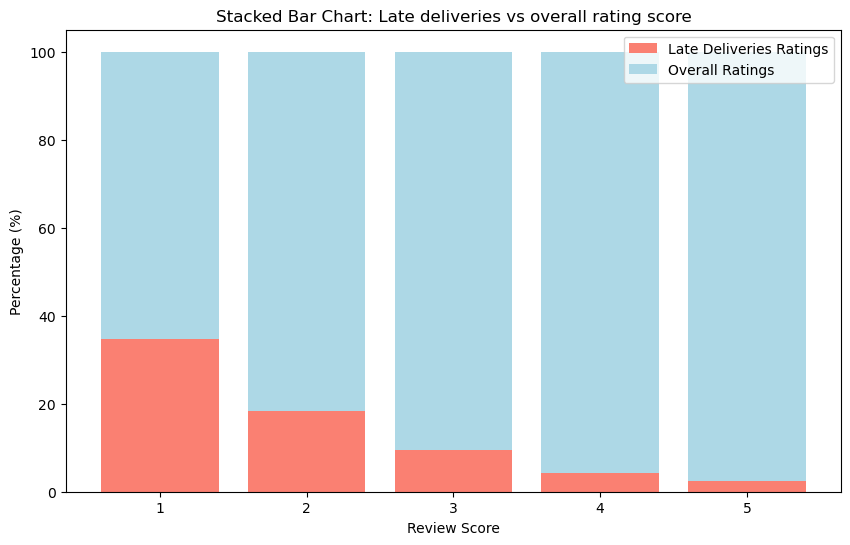

In [157]:
remaining_percentage = 100 - relative_percentage

# Combine both percentages into a DataFrame for easier plotting
percentage_df = pd.DataFrame({
    'Review Score': relative_percentage.index,
    'Late Percentage': relative_percentage.values,
    'Remaining Percentage': remaining_percentage.values
})

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(percentage_df['Review Score'], percentage_df['Late Percentage'], label='Late Deliveries Ratings', color='salmon')
plt.bar(percentage_df['Review Score'], percentage_df['Remaining Percentage'], label='Overall Ratings', color='lightblue', bottom=percentage_df['Late Percentage'])

# Adding labels and title
plt.xlabel('Review Score')
plt.ylabel('Percentage (%)')
plt.title('Stacked Bar Chart: Late deliveries vs overall rating score')
plt.legend()

plt.show()

The plot above shows that late deliveries account for 34% of the overall 1-star ratings. Additionally, within the late delivery category, 1-star ratings represent 50% of the total. For 5-star ratings within the late delivery group, the value is 1357, which constitutes 20% of the total late deliveries. However, when considering the entire dataset, this does not significantly affect the overall 5-star rating distribution, unlike the 1-star ratings. 

### 5. Most selling product

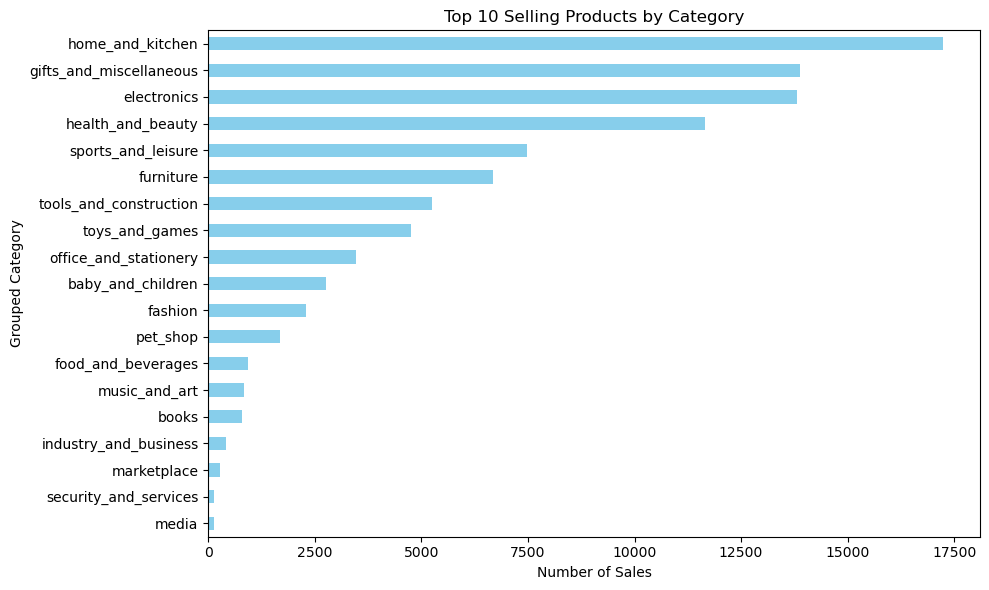

In [158]:
top_selling_products = df['grouped_category'].value_counts().head(10)

top_selling_products = df['grouped_category'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
top_selling_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Selling Products by Category')
plt.xlabel('Number of Sales')
plt.ylabel('Grouped Category')
plt.tight_layout()
plt.show()

### Highest total price per grouped category

In [159]:
total_price_per_product = df.groupby('grouped_category')[['price']].sum().reset_index()
total_price_per_product_sorted = total_price_per_product.sort_values(by='price', ascending=False)
total_price_per_product_sorted

,grouped_category,price
6,gifts_and_miscellaneous,2384004.36
8,home_and_kitchen,1960418.57
7,health_and_beauty,1533312.88
2,electronics,1462072.81
16,sports_and_leisure,875703.65
17,tools_and_construction,708138.63
5,furniture,659584.35
18,toys_and_games,588065.42
13,office_and_stationery,415869.45
0,baby_and_children,384016.60


C:\Users\u0150029\AppData\Local\Temp\ipykernel_24720\4070045408.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


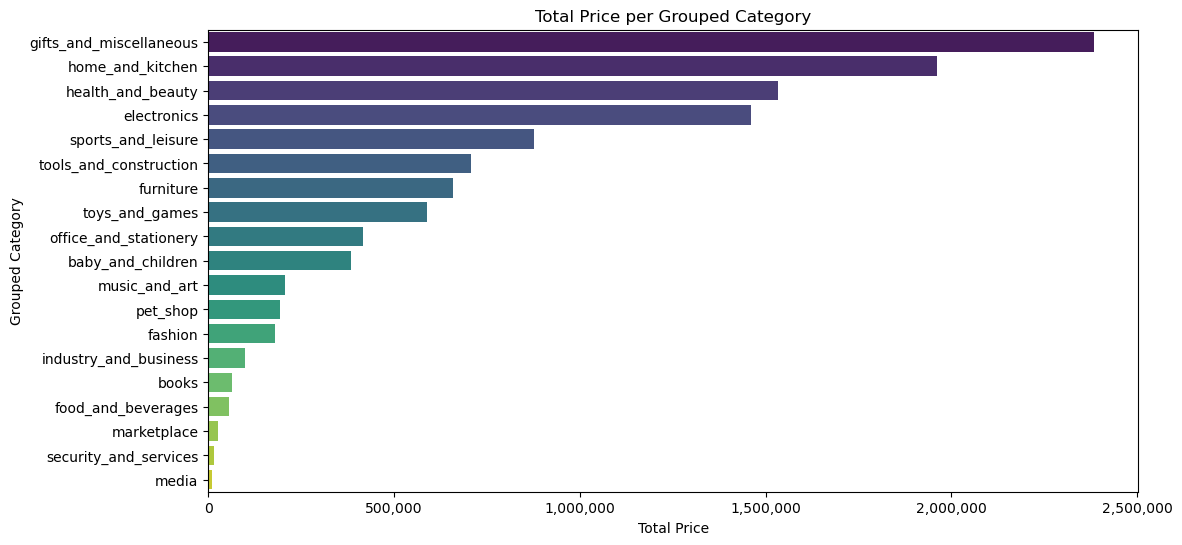

In [160]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=total_price_per_product_sorted, 
    y='grouped_category', 
    x='price', 
    palette='viridis'
)

plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Adds comma separator

plt.xlabel("Total Price")
plt.ylabel("Grouped Category")
plt.title("Total Price per Grouped Category")

plt.show()

From the two figures, we can observe the following relationships:

    High Sales ≠ Highest Revenue
        "Home & Kitchen" has the highest number of sales, but "Gifts & Miscellaneous" has the highest total revenue. This suggests that while home-related products sell in large quantities, the average price per unit may be lower than that of gifts and miscellaneous products.

    Categories with Strong Performance in Both Sales and Revenue
        "Home & Kitchen," "Gifts & Miscellaneous," "Electronics," and "Health & Beauty" appear at the top of both rankings, indicating that these categories have both high sales volume and significant revenue contributions.

    High Revenue but Lower Sales
        "Gifts & Miscellaneous" has a much higher total price ranking compared to its sales rank, indicating that products in this category tend to be higher in price.
        "Health & Beauty" also performs better in revenue relative to sales, suggesting premium pricing in this category.

    High Sales but Lower Revenue
        "Sports & Leisure" and "Furniture" are ranked relatively high in sales but drop slightly in total revenue, indicating that these products might have lower price points or more discounts.

    Low Sales and Low Revenue
        "Media," "Security & Services," "Marketplace," and "Food & Beverages" are at the bottom in both charts, implying that these categories contribute the least to overall business performance.

Possible Correlation:

    There is a moderate positive correlation between the number of sales and total revenue, but it is not perfectly linear because some categories generate high revenue with relatively fewer sales, likely due to higher average prices.
    Categories with lower sales tend to also have lower total revenue, indicating that sales volume is still an important driver of revenue.

### 5. Rating per grouped category

In [161]:
category_total_counts = df['grouped_category'].value_counts().reset_index()

category_total_counts.columns = ['grouped_category', 'total_count']

category_rating_counts = df.groupby(['grouped_category', 'review_score']).size().reset_index(name='count')

category_rating_counts = category_rating_counts.merge(category_total_counts, on='grouped_category', how='left')

category_rating_counts['percentage'] = (category_rating_counts['count'] / category_rating_counts['total_count']) * 100

category_rating_counts[['grouped_category', 'review_score', 'count', 'percentage']]


,grouped_category,review_score,count,percentage
0,baby_and_children,1.0,290,10.537791
1,baby_and_children,2.0,86,3.125000
2,baby_and_children,3.0,239,8.684593
3,baby_and_children,4.0,510,18.531977
4,baby_and_children,5.0,1627,59.120640
...,...,...,...,...
90,toys_and_games,1.0,414,8.723135
91,toys_and_games,2.0,119,2.507375
92,toys_and_games,3.0,389,8.196376
93,toys_and_games,4.0,869,18.310156


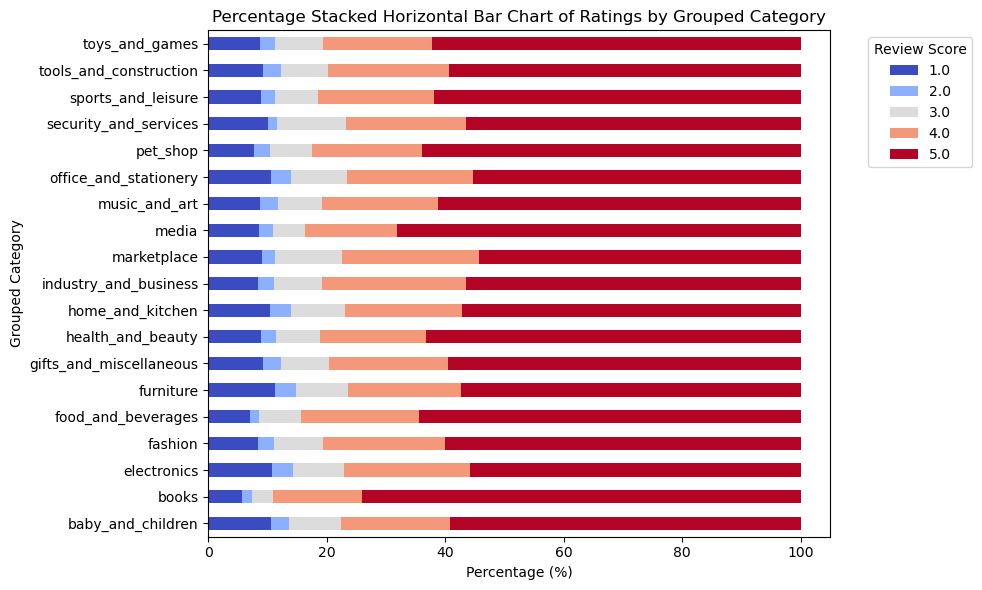

In [162]:
pivot_percentage_data = category_rating_counts.pivot_table(index='grouped_category', columns='review_score', values='percentage', aggfunc='sum')

pivot_percentage_data.plot(kind='barh', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Percentage Stacked Horizontal Bar Chart of Ratings by Grouped Category')
plt.xlabel('Percentage (%)')
plt.ylabel('Grouped Category')
plt.legend(title='Review Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The bar chart illustrates the distribution of ratings across various grouped product categories. The x-axis represents the percentage of each rating while the y-axis lists different grouped categories such as books, media, and furniture. 

Each bar is divided into five colors, corresponding to different ratings, as shown by the legend. The most dominant rating across all categories are 5 ratings, followed by four and one. It is notable that consumers rarely give two and three stars rating. 

### 6. Payment method

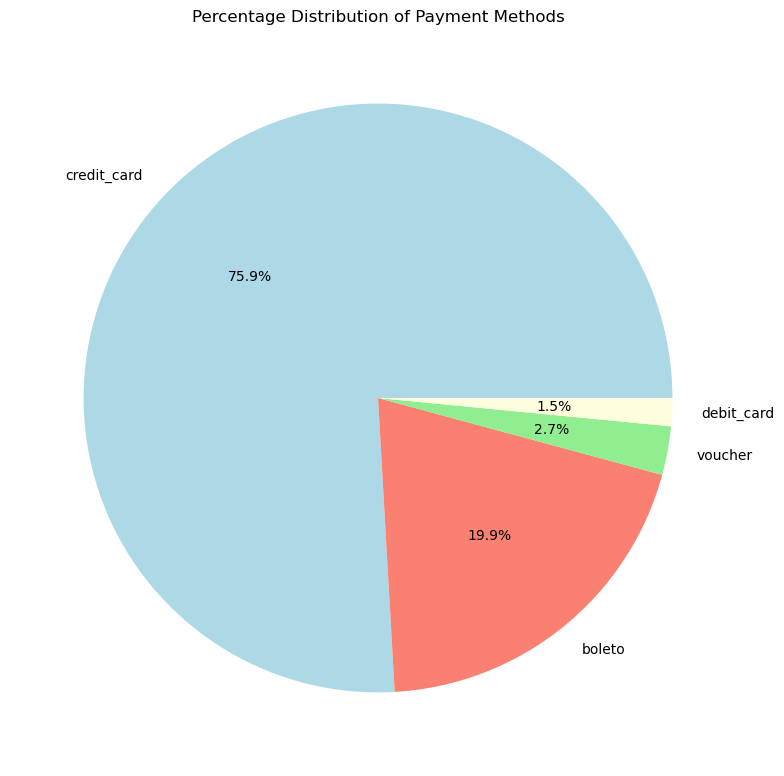

In [163]:
payment_method_counts = df['payment_type'].value_counts()
payment_method_percentage = (payment_method_counts / len(df)) * 100

plt.figure(figsize=(8, 8))
payment_method_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightgreen', 'lightyellow'])
plt.title('Percentage Distribution of Payment Methods')
plt.ylabel('')
plt.tight_layout()
plt.show()

### 7. Payment type per grouped category

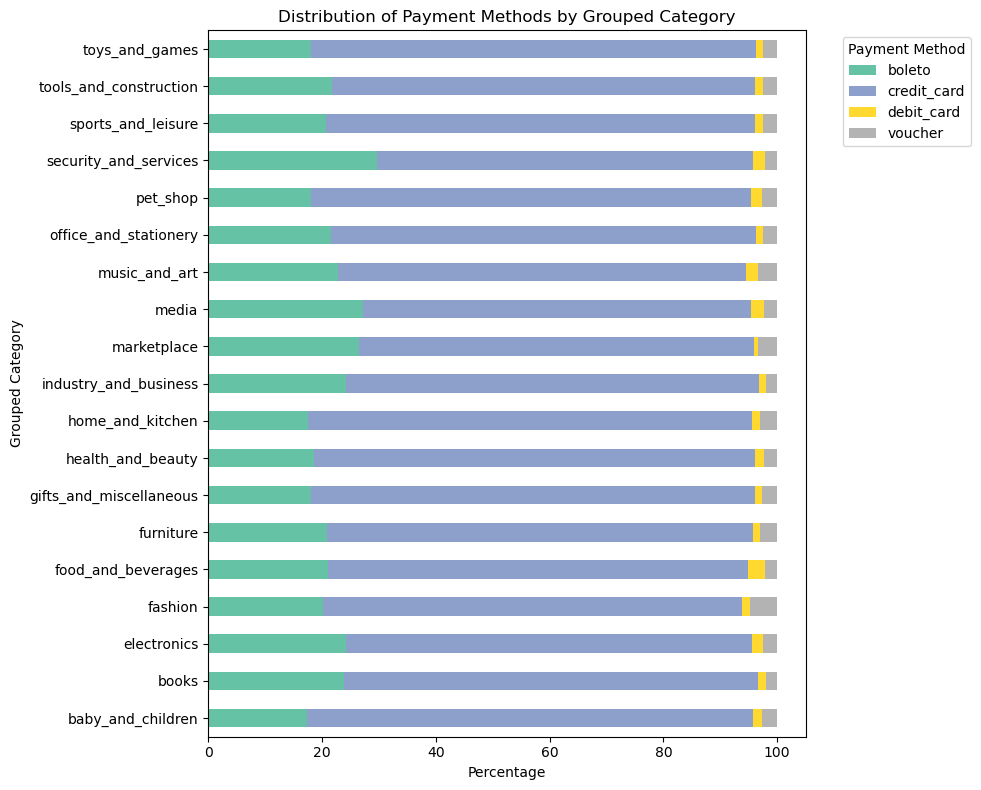

In [164]:
category_payment_counts = df.groupby(['grouped_category', 'payment_type']).size().unstack(fill_value=0)

category_payment_percentage = category_payment_counts.div(category_payment_counts.sum(axis=1), axis=0) * 100
category_payment_percentage.plot(kind='barh', stacked=True, figsize=(10, 8), colormap='Set2')

plt.xlabel('Percentage')
plt.ylabel('Grouped Category')
plt.title('Distribution of Payment Methods by Grouped Category')

plt.legend(title='Payment Method', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout() 
plt.show()

The bar chart illustrates the distribution of payment methods across various grouped product categories. The x-axis represents the percentage of transactions, while the y-axis lists different grouped categories such as electronics, fashion, home and kitchen, and more.

Each bar is divided into four colors, corresponding to different payment methods: boleto (green), credit card (blue), debit card (yellow), and voucher (gray). The most dominant payment method across all categories is the credit card, occupying the majority of each bar. This suggests that consumers primarily rely on credit cards for purchases regardless of the category.

Other payment methods such as boleto and voucher appear in smaller proportions, with debit card contributing a minor share in most cases. Categories such as sports and leisure, industry and business, and electronics show noticeable usage of boleto, but it remains secondary to credit card transactions.

Overall, the chart indicates a clear trend where credit cards dominate online transactions, with alternative methods like boleto and vouchers playing a supplementary role in specific categories, in line with the pie chart above descriving the most used payment method. But there is no clear distinction between the type of payment and the grouped categories.

# RMF

# CHURN PREDICTION

In [165]:
print("churn prediction")

churn prediction


# **Metric**  
This section explores various metrics, and from this analysis, the best model will be selected.  

## **Precision**  
Precision measures the model's accuracy in predicting true positives out of all positive predictions. It is particularly useful when the cost of False Positives (FP) is high, as it helps minimize FP.  

In this case study, FP refers to customers predicted to churn by the model but who, in reality, do not churn. In other words, among all the customers classified as churn, how many actually churned?  

Here, two models are compared: x and y
- **x:**  
  - Precision: ....
  - Out of .... customers classified as churn, .... (.... customers) are correctly predicted, while a customers are incorrectly predicted as churn.  

- **y:**  
  - Precision: .....
  - Out of .... customers classified as churn, .... are correctly predicted, and .... are incorrectly predicted as churn.  

## **Recall**  
Recall measures the model's ability to correctly predict true positives out of all actual positive observations. It is suitable when the cost of False Negatives (FN) is high, as it helps minimize FN.  

- **x:**  
  - Recall: ....
  - Out of .... customers who actually churned, .... (.... customers) are correctly predicted, while .... are mistakenly predicted as not churn.  

- **y:**  
  - Recall: ....
  - Out of .... customers who actually churned, .... are correctly predicted, while .... are mistakenly predicted as not churn.  

## **F1-Score**  
Since there is often a trade-off between precision and recall, the F1-Score provides a balanced metric that combines both. It is particularly useful when both False Positives and False Negatives contribute significantly to the cost.  

- **x:** F1-Score: ....
- **y:** F1-Score: ....

The higher the F1-Score, the better the overall performance of the model.  

# **ROC AUC CURVE**  

The ROC AUC curve is used to show a model's ability to classify positive and negative classes (churn or no churn) across various thresholds, which represent the probability limits used by the model to determine the class.  

- **FPR (False Positive Rate):**  
  The FPR is the ratio of False Positives (FP) to the total number of negative samples (TN + FP). It indicates how often the model incorrectly predicts a negative sample as positive, with a value of 0 meaning no mistakes were made.  

- **TPR (True Positive Rate):**  
  The TPR is the ratio of True Positives (TP) to the total number of positive samples (TP + FN). It shows how often the model correctly predicts positive values from all actual positive observations. A value of 1 means the model captures all positive samples correctly.  

The ROC curve approaches the upper-left corner, indicating better performance as the FPR is low and the TPR is high. This means the model is correctly predicting positive values while minimizing mistakes in predicting negative values (no churn).  

For example, if the TPR is 95% and the FPR is 15%, it means the model is correctly predicting 95% of the churned customers, but 15% of non-churn customers are mistakenly predicted as churn.  

- **XGBC Model:** AUC = ....
- **RF Model:** AUC = ....

Both AUC values indicate that the models are good at distinguishing between the positive and negative classes.
